In [1]:
!pip install yfinance scikit-learn matplotlib pandas


     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------- ----------------------------- 0.8/3.0 MB 6.7 MB/s eta 0:00:01
     --------------------------- ------------ 2.1/3.0 MB 6.5 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 6.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------  1.6/1.6 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 7.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-py3-none-any.whl size=139097 sha256=0d92b07f90a986457f3d1669b8d4e479cb50f60c2c0c2c9402c46da7d


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


stock = yf.download("AAPL", start="2022-01-01", end="2024-01-01")

# "TSLA" for Tesla
# "GOOGL" for Google
# "MSFT" for Microsoft




C:\Users\Hp EliteBook\AppData\Local\Temp\ipykernel_9100\1452486829.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download("AAPL", start="2022-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


In [3]:
# Prepare Features and Labels
stock['Next_Close'] = stock['Close'].shift(-1)  # Tomorrow's closing price
df = stock.dropna()  # Drop last row with NaN in Next_Close

features = df[['Open', 'High', 'Low', 'Volume']]
labels = df['Next_Close']


In [5]:
# Spliting Data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=False)

# Train Model
# model = LinearRegression()
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

Mean Squared Error: 8.15


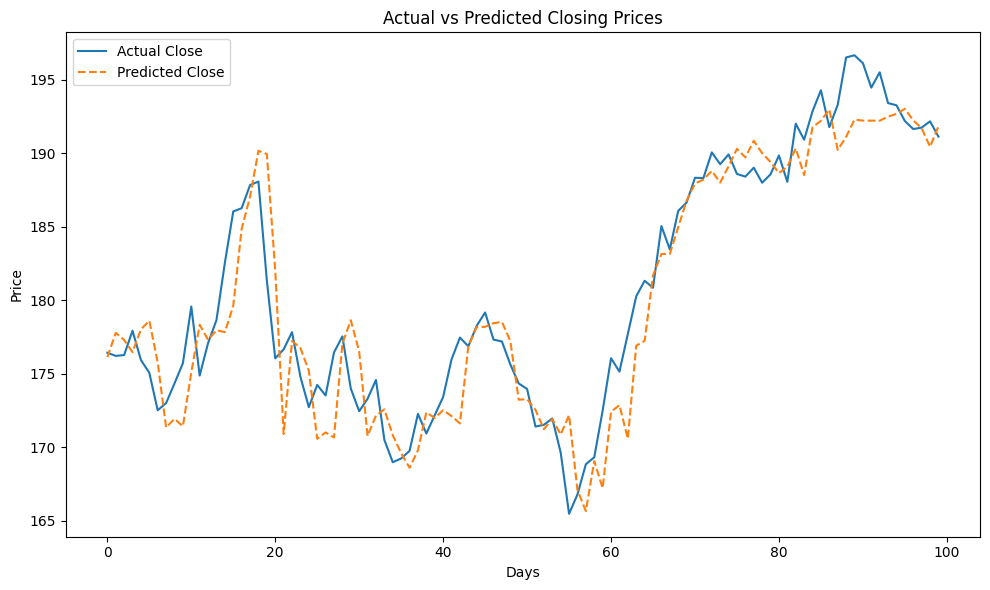

In [7]:
# Make Predictions
predictions = model.predict(X_test)

# Evaluate Model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.2f}")

# Plot Actual vs Predicted Closing Prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Close')
plt.plot(predictions, label='Predicted Close', linestyle='--')
plt.title("Actual vs Predicted Closing Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()


## Stock Price Prediction: Results & Final Thoughts
### What Was Done
- Data: Daily Apple (AAPL) stock prices from 2022–2023 were downloaded.
- Goal: Predict the next day’s closing price using today’s open, high, low, and volume.
- Models: Tried both Linear Regression and Random Forest Regressor.
### Key Results
- Best Model: The Random Forest Regressor performed better than Linear Regression.
- Performance: The Mean Squared Error (MSE) for the Random Forest was about 8.15, which means the model’s predictions are, on average, pretty close to the actual next-day prices (for a stock in the $100–$200 range, this is a reasonable error).
### Final Thoughts
- Random Forests work well: They can capture more complex patterns in stock data than simple linear models.
- Limitations: Predicting stock prices is tough—real markets are influenced by many unpredictable factors not included here.
- Improvements: Adding more features (like technical indicators or news sentiment) and tuning the model could help boost accuracy.